<a href="https://colab.research.google.com/github/binaria010/Mate2B/blob/main/Segunda%20Parte/Fourier/Clase9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 7:

Finalizamos la práctica 7.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 1

Considerar la se\~nal cuadrada de período $T=1$ dada por
$$
f(t) = \begin{cases} &1\qquad \text{si }t \in [-1/2,0)\\
&-1 \quad  \text{si } t \in [0,1/2]
\end{cases}
$$
 Calcular los coeficientes de Fourier para $n = 1, 3, 9, 15$ y graficar en cada caso la se\~nal junto a su polinomio trigonom\'etrico.


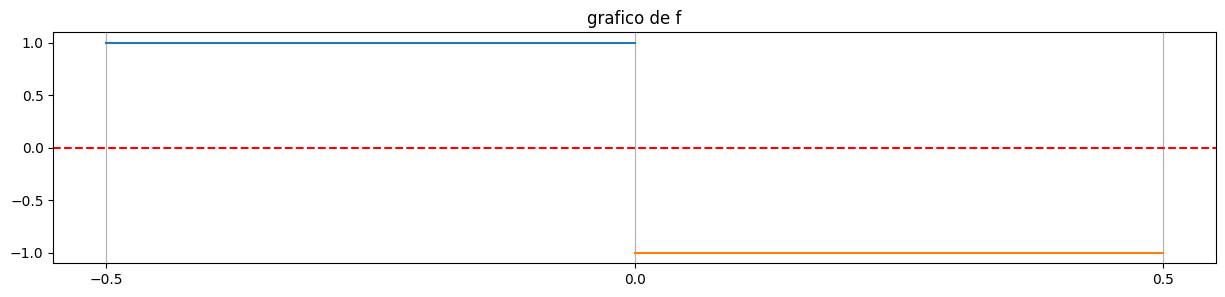

In [2]:
grilla1 =np.linspace(-1/2,0,100)
grilla2 = np.linspace(0, 1/2, 100)


plt.figure(figsize=(15, 3))
plt.plot(grilla1, np.ones(len(grilla1)))
plt.plot(grilla2, -1*np.ones(len(grilla2)))
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(axis = "x")
plt.xticks(np.linspace(-1/2,1/2, 3))
plt.title("grafico de f")
plt.show()


Grafiquemos la funcion en un intervalo mas grande. Ojo que esto es extra, no es necesario que lo hagan!

In [3]:
def periodically_continued(a, b):
    interval = b - a
    return lambda f: lambda x: f((x - a) % interval + a)

def f(x):
    return (x>= -1/2)*(x< 0)*1 - 1*(x>=0)*(x<= 1/2)

g = periodically_continued(-1/2, 1/2)(f)

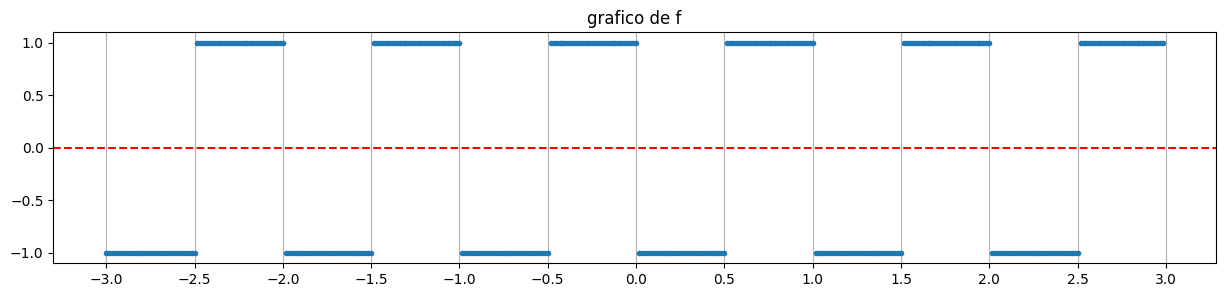

In [4]:
plt.figure(figsize=(15, 3))
grilla = np.arange(-3, 3, 1/60)
plt.plot(grilla, g(grilla), ".")
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(axis = "x")
plt.xticks(np.arange(-3,3+0.5,0.5))
plt.title("grafico de f")
plt.show()





Vamos a considerar como definici\'on de f, en lugar de la dada, la siguiente:
$$
f(t) = \begin{cases} &1\qquad \text{si }t \in [0, 1/2)\\
&-1 \quad  \text{si } t \in [1/2,1]
\end{cases}
$$

esto es posible por la periodicidad de la funci\'on f. Lo hacemos de esta forma para que la integral que define los coeficientes sea en el intervalo $[0,1]$ en lugar del intervalo $[-1/2, 1/2]$

Los coeficientes de Fourier los calculamos con la definici\'on de la integral:
$$
c_k = \frac{1}{T}\int_{0}^{T}f(t)e^{-2\pi i kt}\,dt, \qquad k\in \mathbb{Z} \\
 = \int_{0}^{1/2}-e^{-2\pi ik t}\,dt + \int_{1/2}^{1}e^{-2\pi ik t}\,dt
$$

entonces $c_0 = \int_{0}^{1}f(t)\,dt = \int_{0}^{1/2}-1\,dt + \int_{1/2}^{1}1\,dt  = 0$ y el resto de los coeficientes es:

$$
\begin{align*}
c_k  =& \int_{0}^{1/2}-e^{-2\pi ik t}\,dt + \int_{1/2}^{1}e^{-2\pi ik t}\,dt = \left.\frac{1}{2\pi i k}e^{-2\pi ik t}\right|_{0}^{0.5} -\left. \frac{1}{2\pi i k}e^{-2\pi ik t}\right|_{0.5}^{1}\\
\\
 =& \frac{i}{\pi k} + (-1)^{k+1}\frac{i}{\pi k} =  \frac{i}{\pi k}(1 + (-1)^{k+1}) =\begin{cases} 0 & \quad\text{si k es par}\\
 \\
 \frac{2i}{\pi k} & \quad\text{si k es impar} \end{cases}
\end{align*}
$$

A partir de estos coeficientes armamos los polinomios trigonom\'etricos de grados $n=1,3,9$:

$$
P_1 = \sum_{k=-1}^{k=1}c_k e^{2\pi ikt} = c_{-1}e^{-2\pi it} +c_{0}e^{2\pi i 0 t} + c_1e^{2\pi i t} = \frac{-2i}{\pi} e^{-2\pi it} + \frac{2i}{\pi} e^{2\pi it} = \frac{2i}{\pi}(e^{2\pi it} - e^{-2\pi it}) =  \frac{2i}{\pi}2i\sin(2\pi t) = \frac{-4}{\pi}\sin(2\pi t)
$$

Agreguemos el gr\'afico de esta funcion al grafico de $f$:




In [5]:
P1 = lambda t: -2j/np.pi *np.exp(-2*np.pi *1j*t) + 2j/np.pi *np.exp(2*np.pi *1j*t)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


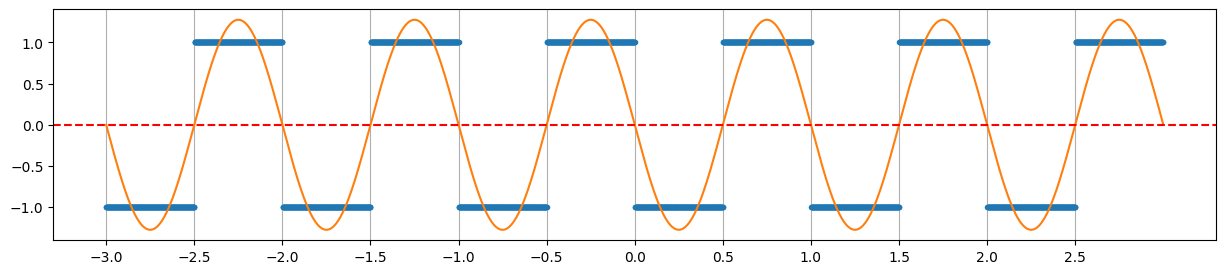

In [6]:
grilla = np.arange(-3, 3, 1/600)

plt.figure(figsize=(15, 3))

plt.plot(grilla, g(grilla), ".")
plt.plot(grilla, P1(grilla))
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(axis = "x")
plt.xticks(np.arange(-3,3, 1/2))
plt.show()

PAra $P_3$:

$$
P_3 = \sum_{k=-3}^{k=3}c_k e^{2\pi ikt} = c_{-3}e^{-6\pi it} + c_{-1}e^{2\pi i t} +c_{1}e^{2\pi it} + c_{3}e^{6\pi i t}  = \frac{-2i}{6\pi} e^{-6\pi it} - \frac{2i}{\pi} e^{-2\pi it}  + \frac{2i}{\pi} e^{2\pi it} + \frac{2i}{6\pi} e^{6\pi it}
$$

Agreguemos el gr\'afico de esta funcion al grafico de $f$:




In [7]:
def coeffs(k):
  if k == 0:
    return 0
  else:
    return np.array((k%2 == 1)).astype(int)*2j/(np.pi*k)

c_K = lambda K:  np.array([coeffs(k) for k in K])

print(coeffs(0))

print(2j/np.pi)

print("los coeficientes c_{-1} y c_{1} son: ", c_K([0,1]))


0
0.6366197723675814j
los coeficientes c_{-1} y c_{1} son:  [0.+0.j         0.+0.63661977j]


In [8]:
K1 = np.arange(-3, 3, 1)

P3 = lambda t: np.dot(c_K(K1), np.array([np.exp(2*np.pi *1j*k*t) for k in K1]))
#P3 = lambda t: np.dot(np.array([coeffs(k) for k in K1]), np.array([np.exp(2*np.pi *1j*k*t) for k in K1]))

In [9]:
P3(1)

(4.677806199023251e-16-0.2122065907891938j)

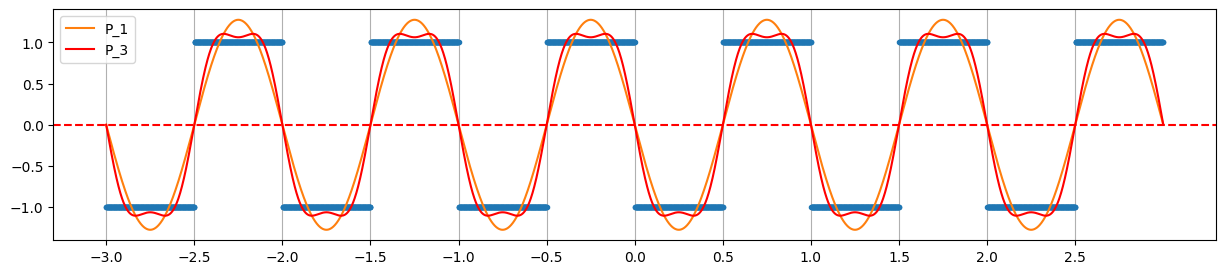

In [10]:
grilla = np.arange(-3, 3, 1/600)

plt.figure(figsize=(15, 3))

plt.plot(grilla, g(grilla), ".")
plt.plot(grilla, P1(grilla), label = "P_1")
plt.plot(grilla, P3(grilla), color = "red", label = "P_3")
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(axis = "x")
plt.xticks(np.arange(-3,3, 1/2))
plt.legend()
plt.show()

Para $P_9$ una cuenta similar nos conduce a:

$$
P_9 = \sum_{k=-9}^{k=9}c_k e^{2\pi ikt} = c_{-9}e^{-18\pi it} +c_{-7}e^{-14\pi it} +c_{-5}e^{-10\pi it}+c_{-3}e^{--6\pi it} + c_{-1}e^{2\pi i t} +c_{1}e^{2\pi it} + c_{3}e^{6\pi i t} +c_{5}e^{10\pi it}  +c_{7}e^{14\pi it} +c_{9}e^{18\pi it} \\
= \frac{-2i}{9\pi}e^{-18\pi it} +\frac{-2i}{7\pi}e^{-14\pi it} +\frac{-2i}{5\pi}e^{-10\pi it}+\frac{-2i}{3\pi}e^{-6\pi it} +\frac{-2i}{\pi}e^{2\pi i t} +\frac{2i}{\pi}e^{2\pi it} + \frac{2i}{3\pi}e^{6\pi i t} +\frac{2i}{5\pi}e^{10\pi it}  +\frac{2i}{7\pi}e^{14\pi it} +\frac{2i}{9\pi}e^{18\pi it}
$$

Agreguemos el gr\'afico de esta funcion al grafico de $f$:




In [11]:
K2 = np.arange(-9, 9, 1)

P9 = lambda t: np.dot(c_K(K2), np.array([np.exp(2*np.pi *1j*k*t) for k in K2]))

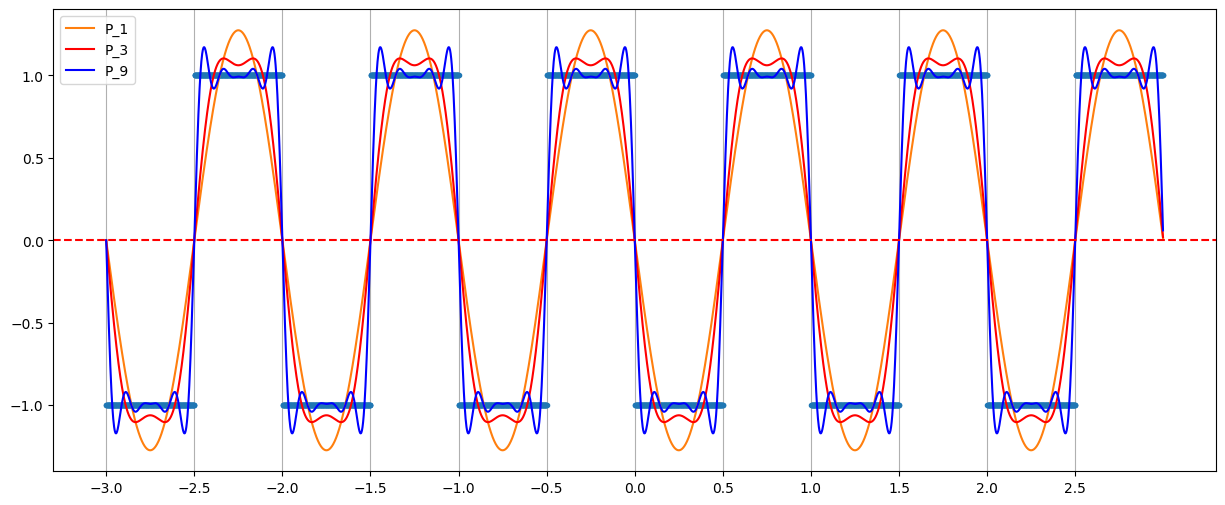

In [12]:
grilla = np.arange(-3, 3, 1/600)

plt.figure(figsize=(15, 6))

plt.plot(grilla, g(grilla), ".")
plt.plot(grilla, P1(grilla), label = "P_1")
plt.plot(grilla, P3(grilla), color = "red", label = "P_3")
plt.plot(grilla, P9(grilla), color = "blue", label = "P_9")
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(axis = "x")
plt.xticks(np.arange(-3,3, 1/2))
plt.legend()
plt.show()

In [13]:
K3 = np.arange(-15, 15, 1)

P15 = lambda t: np.dot(c_K(K3), np.array([np.exp(2*np.pi *1j*k*t) for k in K3]))

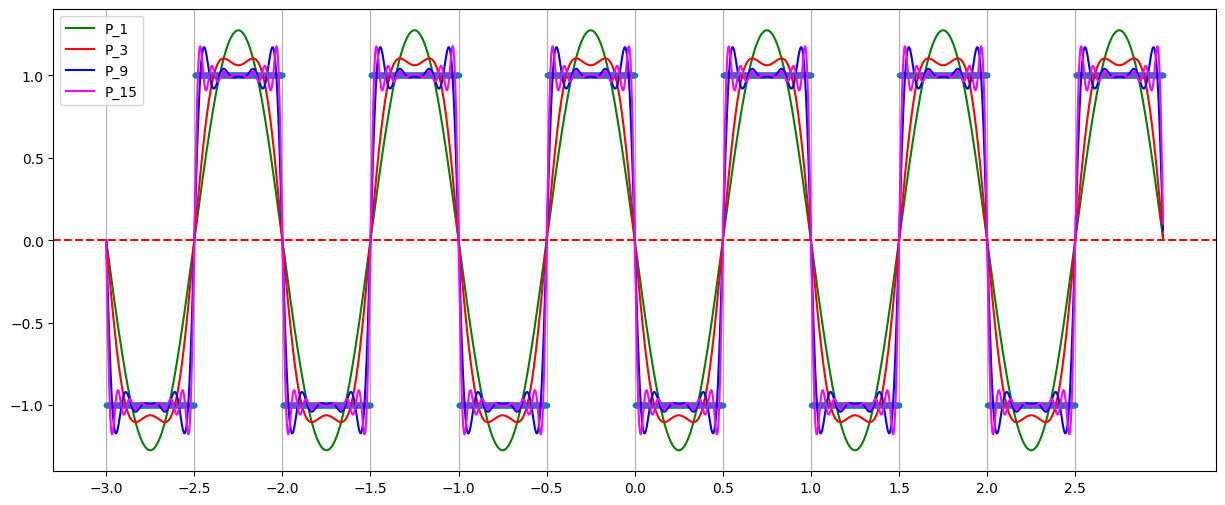

In [14]:
grilla = np.arange(-3, 3, 1/600)

plt.figure(figsize=(15, 6))

plt.plot(grilla, g(grilla), ".")
plt.plot(grilla, P1(grilla), color = "green", label = "P_1")
plt.plot(grilla, P3(grilla), color = "red", label = "P_3")
plt.plot(grilla, P9(grilla), color = "blue", label = "P_9")
plt.plot(grilla, P15(grilla), color = "magenta", label = "P_15")
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(axis = "x")
plt.xticks(np.arange(-3,3, 1/2))
plt.legend()
plt.show()



---



---



---



## Ejercicio 2:

Considerar la se\~nal ``ruidosa'' generada haciendo
$$
s_k=s(t_k)=\sin(\omega t_k)+\varepsilon \eta_k=\sin(\omega\ldotp \Delta t \ldotp k)+\varepsilon \eta_k
$$

 donde $\eta_k$ es un ruido gaussiano de media cero y varianza $1$, y $\varepsilon$ es pequeño ($\varepsilon=0.1$, por ejemplo). Generar una instancia en Python y graficar. Usar $\Delta t=1$ y $\omega=0,\frac{\pi}{6}, \frac{\pi}{2},\pi,\pi+\frac{\pi}{6}$, por ejemplo. ¿Qu\'e se observa? Implementar ahora un promedio móvil:
$$
 y_k = \frac{1}{2N+1} \sum_{j=-N}^N s_{k-j},
$$
con $N=1,5,10$, por ejemplo. Graficar $y_k$ junto con $s_k$. Graficar también los módulos de sus transformadas de Fourier discretas.


In [22]:
def noisy_signal(k, omega, deltat, epsilon=0.01):

  s = np.sin(omega*deltat*k) + epsilon*np.random.normal(loc = 0, scale =1)

  return s


ejemplo con N=1:

In [23]:
deltat = 1
omega = np.pi/6
N = 1
K = np.arange(0,100,1)

S = noisy_signal(K, omega, deltat)
y = np.array([np.mean([noisy_signal(k-j, omega, deltat) for j in range(-N, N+1)]) for k in K])

S.shape

(100,)

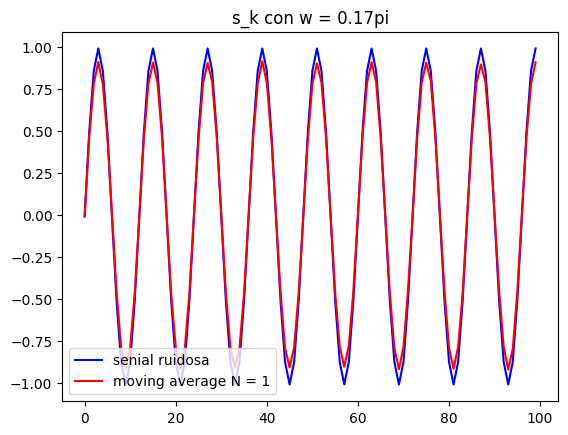

In [24]:
plt.plot(S, color = "b", label = "senial ruidosa")
plt.plot(y, color = "red", label = "moving average N = " +str(N))
plt.legend()
plt.title("s_k con w = "+str(np.round(omega/np.pi,2)) + "pi")
plt.show()

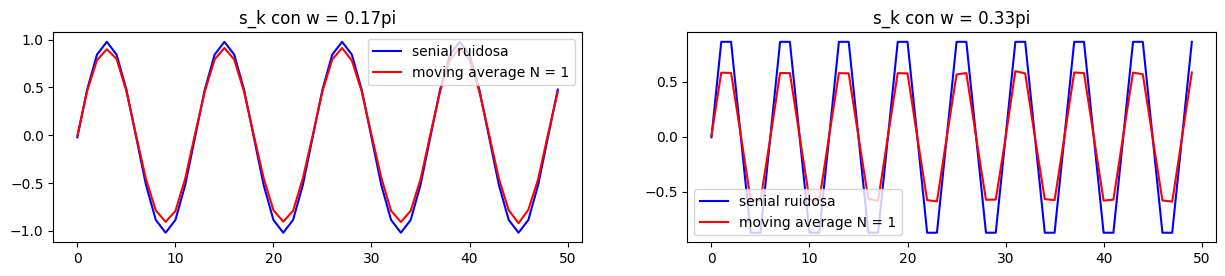

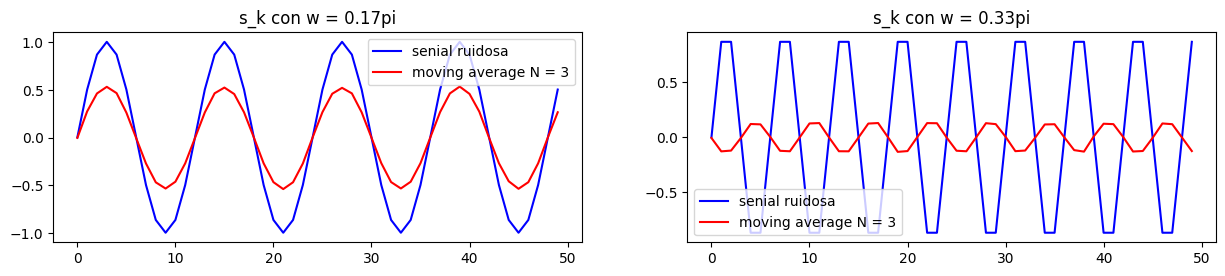

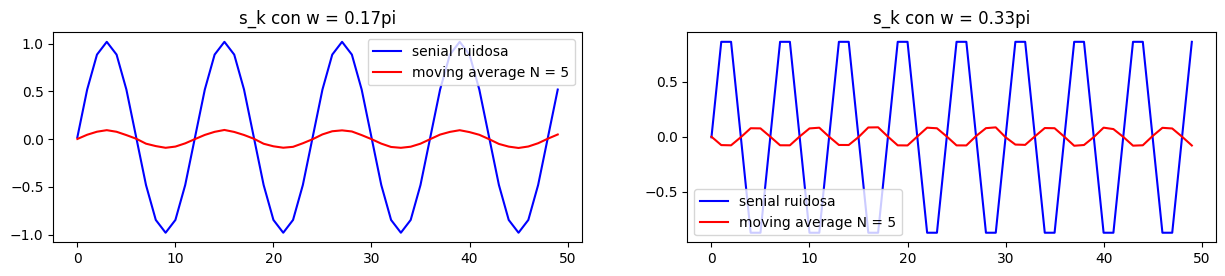

In [25]:
deltat = 1
Omegas = [np.pi/6, np.pi/3]
K = np.arange(0,50,1)

for N in [1, 3, 5]:
  plt.figure(figsize = (15,6))
  for i, omega in enumerate(Omegas):

    S = noisy_signal(K,omega, deltat)
    y = np.array([np.mean([noisy_signal(k-j, omega, deltat) for j in range(-N, N+1)]) for k in K])
    plt.subplot(2,2,i+1)
    plt.plot(S, color = "b", label = "senial ruidosa")
    plt.plot(y, color = "red", label = "moving average N = " +str(N))
    plt.legend()
    plt.title("s_k con w = "+str(np.round(omega/np.pi,2)) + "pi")

In [19]:
from scipy.fft import fft, ifft

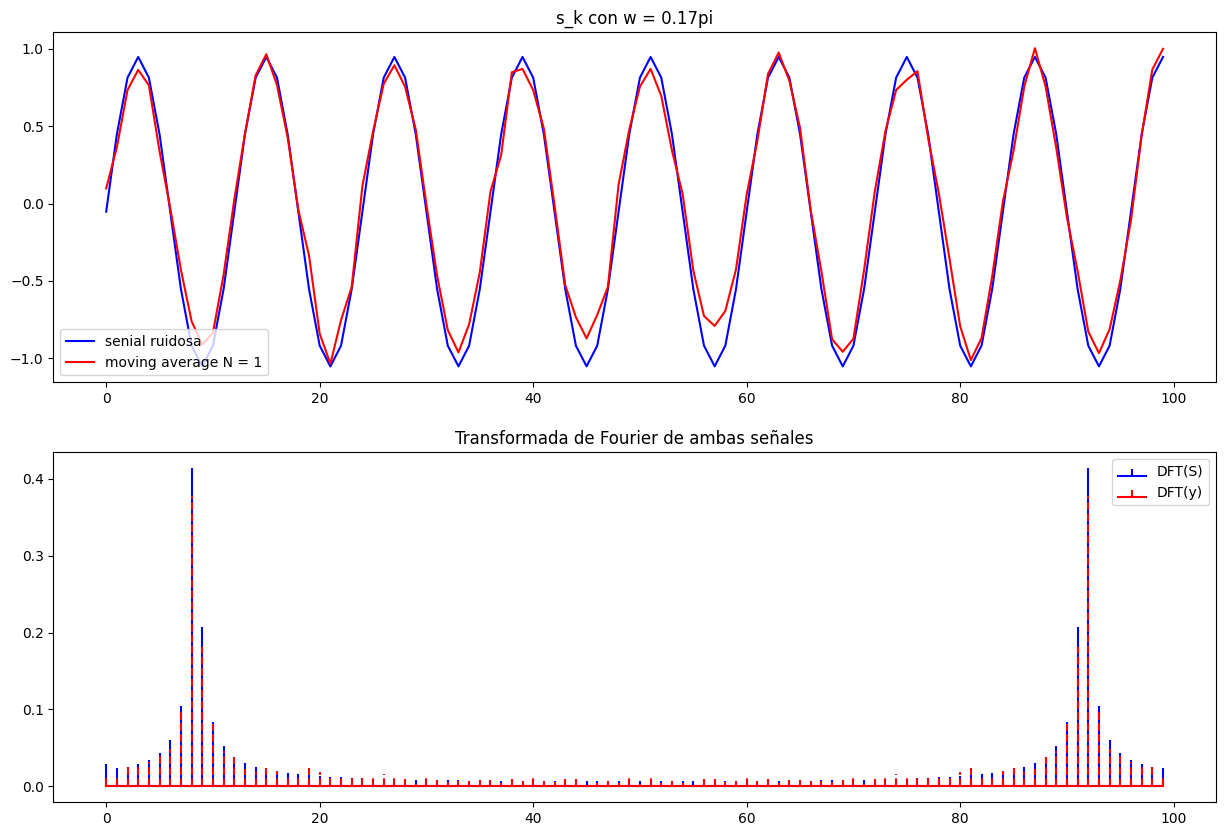

In [20]:
deltat = 1
K = np.arange(0,100,1)
N = 1
omega = np.pi/6
plt.figure(figsize = (15,10))

S = noisy_signal(K,omega, deltat)
y = np.array([np.mean([noisy_signal(k-j, omega, deltat) for j in range(-N, N+1)]) for k in K])
plt.subplot(2,1,1)
plt.plot(S, color = "b", label = "senial ruidosa")
plt.plot(y, color = "red", label = "moving average N = " +str(N))
plt.legend()
plt.title("s_k con w = "+str(np.round(omega/np.pi,2)) + "pi")

fft_s = fft(S)/len(S)
fft_y = fft(y)/len(y)

plt.subplot(2,1,2)
plt.stem(np.abs(fft_s), label = "DFT(S)",  linefmt='b', markerfmt=" ", basefmt="-b")
plt.stem(np.abs(fft_y), label = "DFT(y)",  linefmt='--r', markerfmt=" ", basefmt="-r")
plt.legend()
plt.title("Transformada de Fourier de ambas señales")

plt.show()

